# Classify handwritten digits using the famous MNIST data

## Load Data

The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.  As the competition progresses, we will release tutorials which explain different machine learning algorithms and help you to get started.

The data for this competition were taken from the MNIST dataset. The MNIST ("Modified National Institute of Standards and Technology") dataset is a classic within the Machine Learning community that has been extensively studied.  More detail about the dataset, including Machine Learning algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
np.set_printoptions(suppress=True)
plt.style.use('ggplot')
%matplotlib inline

train = pd.read_csv(os.path.expanduser('~/Data/kaggle/digit-recognizer/train.csv'))
tournament = pd.read_csv(os.path.expanduser('~/Data/kaggle/digit-recognizer/test.csv'))
print('# train examples: {}'.format(train.shape))
print('# test examples: {}'.format(tournament.shape))

# train examples: (42000, 785)
# test examples: (28000, 784)


## First look at the data

**What is the shape of the data?**

** Investigate data format**

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dataset contains **70000 examples** and each example has **28x28** raw-features (greyscale pixel intensities). This implies 784-dimensional feature space. Data are **already split to train and test** sets.

**How many target classes? Is the dataset balanced? **

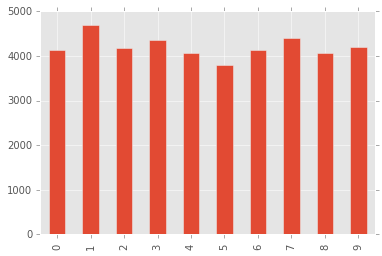

In [4]:
train.label.value_counts().sort_index().plot(kind='bar')

There are **10 classes** to be distinguished by our model - each class corresponds to one digit (including zero). Dataset is (almost) balanced.

## Data preprocessing

Data provided by *Kaggle* are well prepared (we don't need to read raw images) but it needs a bit more preparation before it can be delivered to our model.

Looking at the first example in the dataset we can see it is 28x28 grey-scale image. This implies the dimension of our feature space - **784-dimensional feature vector** describing each example.

*Note: Using only raw-pixel values is a bit naive approach and is very sensitive to noise.*

Each row in this matrix corresponds to one example and each column correspond to one feature (grey-scale pixel intensity).

** Normalize the features **

As we can see, these values are absolute so we need to normalize them to scale from 0-1. We can use *Min-Max Scaling* from *Scikit-Learn* but as X<sub>min</sub> is 0 we can just divide every element by 255.

The standardization is given by form:

$$ 
    X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} = \frac{X}{X_{max}}
$$

In [5]:
X = train.drop('label', axis=1).values.astype(np.float32) / 255.0
y = train.label.values
X[0, :]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

## Dimensionality Reduction

As feature space is high-dimensional it's not easy to look at the class separability in the same manner as with *Iris* dataset (where we used *scatter matrix*) - projecting to two dimensions is the easiest way. We can use a dimensionality reduction technique called **PCA (Principal Component Analysis)**. 

PCA transforms the data from higher-dimensional space to lower-dimensional space while it preserves as much variability in the data as possible.

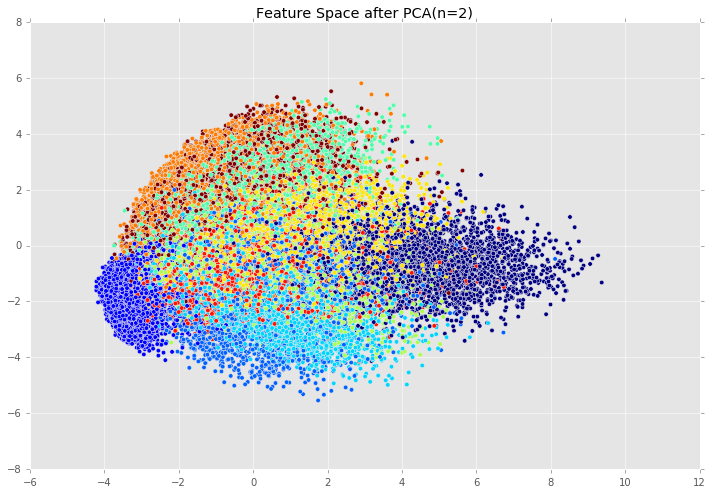

In [7]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(12, 8))
plt.title('Feature Space after PCA(n=2)')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y);

We can see that (almost) each class is nicely separable from the others - this is always a good prerequisite for good results of our learning algorithm.

## Learning the Model

First of all we need to split our data to **train** and **test** sets. This split is often done using 70/30 ratio. This is a necessity as we want to get unbiased estimate of our model's performance. If we would use whole data as our train set we will get overly optimistic estimate.

As classes are balanced in our data we don't need to use *Stratified Sampling*.

In [9]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('X (train) size: %s' % repr(X_train.shape))
print('X (test) size: %s' % repr(X_test.shape))

X (train) size: (29400, 784)
X (test) size: (12600, 784)


Next step is to deliver our train set to our model so it can learn from examples with known labels - this is called **Supervised Learning**.

## #1 Model (Logit Model, simple)

In [10]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

As was previously told - when we are trying to evaluate learning algorithm's performance on same data, we can get an overly optimistic estimate.

In [11]:
logit.score(X_train, y_train)

0.93227891156462583

So we need to provide a separate, previously unseen data to see the classifier's **generalization ability** on new examples.

In [12]:
logit.score(X_test, y_test)

0.91515873015873017

## #2 Model (Random Forrest, more complex)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [34]:
model.score(X_train, y_train)

1.0

In [35]:
model.score(X_test, y_test)

0.9613492063492064

## Hyperparameter Tuning (Optional)

In [ ]:
from sklearn.grid_search import GridSearchCV

param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'max_features': [1.0, 0.5, 0.1]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=3, verbose=3)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

## #3 Simple MLP

In [75]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

y_train_ohe = np_utils.to_categorical(y_train)
y_test_ohe = np_utils.to_categorical(y_test)

model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], output_dim=50, init='uniform', activation='relu'))
model.add(Dense(input_dim=50, output_dim=50, init='uniform', activation='relu'))
model.add(Dense(input_dim=50, output_dim=y_train_ohe.shape[1], init='uniform', activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
model.fit(X_train, y_train_ohe, batch_size=1000, nb_epoch=100, verbose=2, validation_data=(X_test, y_test_ohe))

Train on 29400 samples, validate on 12600 samples
Epoch 1/100
0s - loss: 2.2316 - acc: 0.3107 - val_loss: 2.0365 - val_acc: 0.4083
Epoch 2/100
0s - loss: 1.5667 - acc: 0.5470 - val_loss: 1.0252 - val_acc: 0.7450
Epoch 3/100
0s - loss: 0.7892 - acc: 0.7806 - val_loss: 0.6107 - val_acc: 0.8263
Epoch 4/100
0s - loss: 0.5406 - acc: 0.8467 - val_loss: 0.4795 - val_acc: 0.8651
Epoch 5/100
0s - loss: 0.4458 - acc: 0.8751 - val_loss: 0.4171 - val_acc: 0.8839
Epoch 6/100
0s - loss: 0.3953 - acc: 0.8880 - val_loss: 0.3834 - val_acc: 0.8936
Epoch 7/100
0s - loss: 0.3634 - acc: 0.8964 - val_loss: 0.3538 - val_acc: 0.9021
Epoch 8/100
0s - loss: 0.3368 - acc: 0.9054 - val_loss: 0.3407 - val_acc: 0.9040
Epoch 9/100
0s - loss: 0.3197 - acc: 0.9095 - val_loss: 0.3215 - val_acc: 0.9112
Epoch 10/100
0s - loss: 0.3058 - acc: 0.9111 - val_loss: 0.3094 - val_acc: 0.9119
Epoch 11/100
0s - loss: 0.2924 - acc: 0.9155 - val_loss: 0.2988 - val_acc: 0.9148
Epoch 12/100
0s - loss: 0.2810 - acc: 0.9192 - val_loss: 

In [77]:
from sklearn.metrics import accuracy_score

y_pred = model.predict_classes(X_train)
accuracy_score(y_train, y_pred)

29400/29400 [==============================] - 1s     


0.99316326530612242

In [78]:
y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

12600/12600 [==============================] - 0s     


0.95761904761904759

## 4 MLP + data augmentation

with data augmentation stronger than ever before

In [26]:
import scipy.ndimage as nd
from scipy.ndimage import convolve
import random

def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_matricies = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]
    shift = lambda x, w: convolve(x.reshape((28, 28)), mode='constant', weights=w).ravel()
    X = np.concatenate([X] + [np.apply_along_axis(shift, 1, X, direction) for direction in direction_matricies])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

def rotate_dataset(X,Y):
    XX = np.zeros(X_train.shape)
    for index in range(X.shape[0]):
        angle = np.random.randint(-7,7)
        XX[index,:] = nd.rotate(np.reshape(X[index,:],((28,28))),angle,reshape=False).ravel()
    X = np.vstack((X,XX))
    Y = np.hstack((Y,Y))
    return X, Y

X_train, y_train = nudge_dataset(X_train, y_train)
X_train, y_train = rotate_dataset(X_train, y_train)

In [51]:
X_train.shape

(420000, 784)

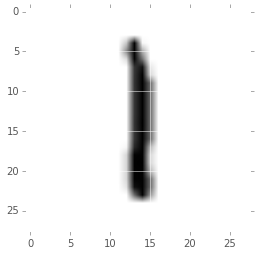

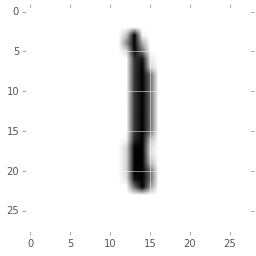

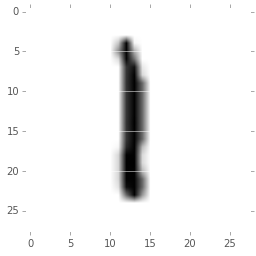

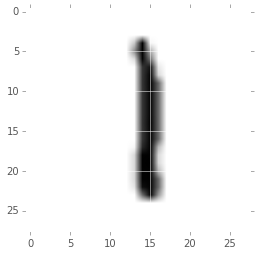

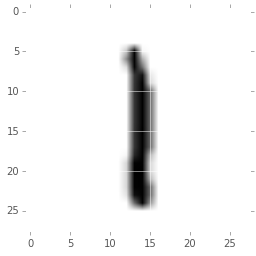

In [52]:
for img in nudge_dataset(X[1000:1001, :], y[1000:1001])[0]:
    plt.figure()
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.Greys) 

# CNN

In [80]:
from keras.utils import np_utils

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_test.shape

# one hot encode outputs
y_train_ohe = np_utils.to_categorical(y_train, num_classes)
y_test_ohe = np_utils.to_categorical(y_test, num_classes)

num_pixels = X_train.shape[2] * X_train.shape[3]
num_classes = y_test_ohe.shape[1]

In [85]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils

nb_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

input_shape = (1, img_rows, img_cols)

model = Sequential()
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], border_mode='valid', input_shape=input_shape, activation='relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [86]:
model.fit(X_train, y_train_ohe, batch_size=128, nb_epoch=10, verbose=2, validation_data=(X_test, y_test_ohe))

Train on 29400 samples, validate on 12600 samples
Epoch 1/10
70s - loss: 0.4906 - acc: 0.8423 - val_loss: 0.1376 - val_acc: 0.9585
Epoch 2/10
77s - loss: 0.1826 - acc: 0.9458 - val_loss: 0.1048 - val_acc: 0.9675
Epoch 3/10
57s - loss: 0.1376 - acc: 0.9590 - val_loss: 0.0782 - val_acc: 0.9745
Epoch 4/10
61s - loss: 0.1113 - acc: 0.9655 - val_loss: 0.0691 - val_acc: 0.9773
Epoch 5/10
53s - loss: 0.0963 - acc: 0.9711 - val_loss: 0.0617 - val_acc: 0.9812
Epoch 6/10
55s - loss: 0.0845 - acc: 0.9750 - val_loss: 0.0599 - val_acc: 0.9807
Epoch 7/10
48s - loss: 0.0783 - acc: 0.9762 - val_loss: 0.0537 - val_acc: 0.9835
Epoch 8/10
55s - loss: 0.0702 - acc: 0.9784 - val_loss: 0.0538 - val_acc: 0.9839
Epoch 9/10
54s - loss: 0.0644 - acc: 0.9807 - val_loss: 0.0515 - val_acc: 0.9844
Epoch 10/10
50s - loss: 0.0609 - acc: 0.9812 - val_loss: 0.0484 - val_acc: 0.9861


In [88]:
from sklearn.metrics import accuracy_score

y_pred = model.predict_classes(X_train)
accuracy_score(y_train, y_pred)

INFO (theano.gof.compilelock): Refreshing lock /home/vasek/.theano/compiledir_Linux-4.4--generic-x86_64-with-Ubuntu-16.04-xenial-x86_64-3.5.1+-64/lock_dir/lock


29400/29400 [==============================] - 19s    


0.99285714285714288

In [89]:
from sklearn.metrics import accuracy_score

y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

12600/12600 [==============================] - 8s     


0.98611111111111116

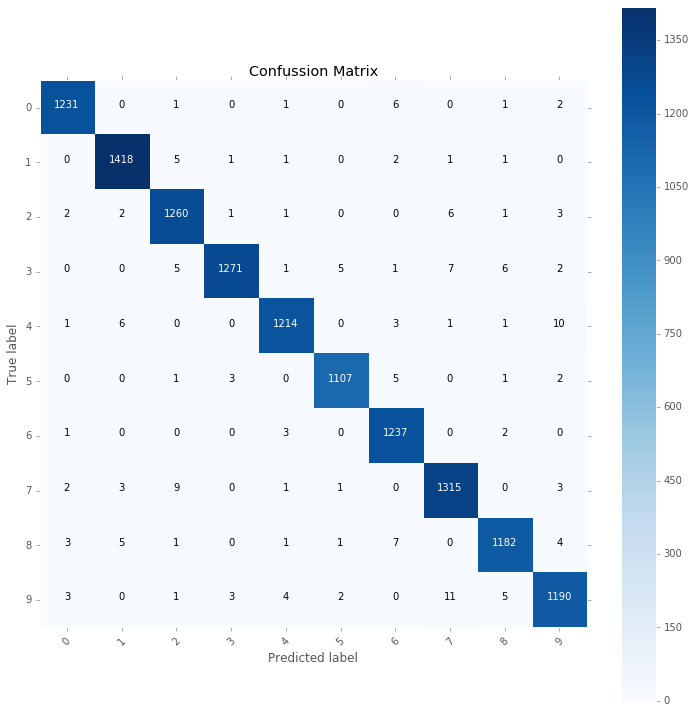

In [90]:
from sklearn.metrics import confusion_matrix
import itertools

classes = np.unique(y_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confussion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.grid(False)
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label');

## Generate submission

Don't forget to normalize and reshape tournament set

In [91]:
X_tournament = tournament.values / 255.0
X_tournament = X_tournament.reshape(X_tournament.shape[0], 1, 28, 28)
X_tournament[1200]

array([[[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.12,  1.  ,  0.18,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.2 ,  0

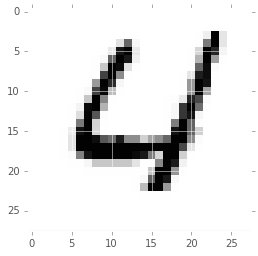

In [92]:
plt.imshow(X_tournament[1200].reshape(28, 28), cmap=plt.cm.Greys, interpolation='none')

Make predictions for whole test set - 28000 predictions

In [93]:
X_tournament.shape

(28000, 1, 28, 28)

In [94]:
predictions = model.predict_classes(X_tournament)
predictions

28000/28000 [==============================] - 20s    


array([2, 0, 9, ..., 3, 9, 2])

# Generate submission

Generate submissision - each line is one prediction.

In [95]:
submission = pd.read_csv(os.path.expanduser('~/Data/kaggle/digit-recognizer/sample_submission.csv'), index_col='ImageId')
submission['Label'] = predictions
submission.shape

(28000, 1)

In [96]:
submission.head()

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3


In [97]:
submission.to_csv(os.path.expanduser('~/Data/kaggle/digit-recognizer/submission.csv'))